In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as stats
import warnings 
warnings.filterwarnings("ignore")

import math

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

pd.set_option('display.max_columns',100)

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/data-processing-in-house-price/X_test.csv
/kaggle/input/data-processing-in-house-price/y_train.csv
/kaggle/input/data-processing-in-house-price/X_train.csv
/kaggle/input/data-processing-in-house-price/__results__.html
/kaggle/input/data-processing-in-house-price/__notebook__.ipynb
/kaggle/input/data-processing-in-house-price/__output__.json
/kaggle/input/data-processing-in-house-price/custom.css


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
sample_submission = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
X_train = pd.read_csv('/kaggle/input/data-processing-in-house-price/X_train.csv')
X_test = pd.read_csv('/kaggle/input/data-processing-in-house-price/X_test.csv')
y_train = np.ravel(pd.read_csv('/kaggle/input/data-processing-in-house-price/y_train.csv'))

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

# Random Forest

In [5]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [6]:
#model = RandomForestRegressor(random_state=87)
#parameters = {'n_estimators':[100, 200, 300],
#             'max_depth':range(1,16)
    
#}
#clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1, scoring='r2')
#clf.fit(X_train,np.ravel(y_train))

In [7]:
#clf.best_params_

In [8]:
modelRF = RandomForestRegressor(random_state=87, n_estimators=100, max_depth=12,min_impurity_decrease=0.01)
modelRF.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_impurity_decrease=0.01, random_state=87)

In [9]:
modelRF.score(X_val, y_val)

0.8928554268476235

In [10]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

y_pred=modelRF.predict(X_val)
print('R2 Score:',r2_score(y_true=y_val, y_pred=y_pred))
print('Mean Absolude Error:',mean_absolute_error(y_true=y_val, y_pred=y_pred))
print('Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred))
print('Root Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred, squared=False))

R2 Score: 0.8928554268476235
Mean Absolude Error: 17304.748507461994
Mean Square Error: 821833827.408551
Root Mean Square Error: 28667.64425983675


In [11]:
sample_submission['Id'] = test.reset_index()['Id']
sample_submission.SalePrice = modelRF.predict(X_test)
sample_submission.set_index('Id').to_csv('submissionRF.csv')
print(sample_submission)

        Id      SalePrice
0     1461  126543.397551
1     1462  155357.378085
2     1463  179774.760817
3     1464  180906.540242
4     1465  206202.328944
...    ...            ...
1454  2915   90573.899347
1455  2916   94202.084145
1456  2917  155764.216957
1457  2918  118146.753667
1458  2919  223487.686988

[1459 rows x 2 columns]


# XGBoots Regressor

In [12]:
import xgboost as xgb

In [13]:
#model = xgb.XGBRegressor(random_state=42, booster='gbtree')
#parameters = {'learning_rate': [0.1, 0.01, 0.001],
#             'max_depth': range(1,16),
#              'n_estimators': [100, 200, 300,400,500]
#}
#clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1, scoring='r2')
#clf.fit(X_train,y_train)

In [14]:
#clf.best_params_

In [15]:
xgb_model = xgb.XGBRegressor(random_state=42, 
                             booster='gbtree',
                             learning_rate=0.1,
                             max_depth=3, 
                             n_estimators=300,
                             reg_lambda=0.1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [16]:
xgb_model.score(X_val,y_val)

0.8775732841765045

In [17]:
y_pred=xgb_model.predict(X_val)
print('R2 Score:',r2_score(y_true=y_val, y_pred=y_pred))
print('Mean Absolude Error:',mean_absolute_error(y_true=y_val, y_pred=y_pred))
print('Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred))
print('Root Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred, squared=False))

R2 Score: 0.8775732841765045
Mean Absolude Error: 16844.465927333047
Mean Square Error: 939052846.8408086
Root Mean Square Error: 30643.96917569277


In [18]:
sample_submission['Id'] = test.reset_index()['Id']
sample_submission.SalePrice = xgb_model.predict(X_test)
sample_submission.set_index('Id').to_csv('submissionXGB.csv')
print(sample_submission)

        Id      SalePrice
0     1461  125038.140625
1     1462  158655.109375
2     1463  182980.390625
3     1464  193830.203125
4     1465  187543.062500
...    ...            ...
1454  2915   79797.484375
1455  2916   67679.195312
1456  2917  152468.781250
1457  2918  121669.625000
1458  2919  210319.984375

[1459 rows x 2 columns]


# LightGBM

In [19]:
import lightgbm as lgb

In [20]:
#model = lgb.LGBMRegressor(random_state=42)
#parameters = {'learning_rate': [0.1, 0.01, 0.001],
#              'max_depth': range(1,16),
#              'n_estimators': [100, 200, 300],
#              'num_leaves':[20,30,40,50]
#}
#clf = GridSearchCV(model, parameters, cv=5, n_jobs=-1, scoring='r2')
#clf.fit(X_train,y_train)

In [21]:
#clf.best_params_

In [22]:
lgb_model = lgb.LGBMRegressor(random_state=42,
                             learning_rate=0.1,
                             max_depth=4, 
                             n_estimators=300,
                             num_leaves=20,
                            reg_lambda=0.1
                            )
lgb_model.fit(X_train, y_train)

LGBMRegressor(max_depth=4, n_estimators=300, num_leaves=20, random_state=42,
              reg_lambda=0.1)

In [23]:
lgb_model.score(X_val,y_val)

0.8782744871318297

In [24]:
y_pred=lgb_model.predict(X_val)
print('R2 Score:',r2_score(y_true=y_val, y_pred=y_pred))
print('Mean Absolude Error:',mean_absolute_error(y_true=y_val, y_pred=y_pred))
print('Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred))
print('Root Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred, squared=False))

R2 Score: 0.8782744871318297
Mean Absolude Error: 17134.955378912426
Mean Square Error: 933674391.4360211
Root Mean Square Error: 30556.085996672104


In [25]:
sample_submission['Id'] = test.reset_index()['Id']
sample_submission.SalePrice = lgb_model.predict(X_test)
sample_submission.set_index('Id').to_csv('submissionLGB.csv')
print(sample_submission)

        Id      SalePrice
0     1461  131939.898282
1     1462  154686.429058
2     1463  189697.249371
3     1464  199355.785579
4     1465  193144.189412
...    ...            ...
1454  2915   85908.004295
1455  2916   79376.878276
1456  2917  176021.199165
1457  2918  127598.025712
1458  2919  197837.669234

[1459 rows x 2 columns]


# Neural Network

In [26]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam, SGD
from keras.utils import set_random_seed
from tensorflow_addons.metrics import RSquare

set_random_seed(42)

nn_model =  Sequential()

nn_model.add(Dense(64, input_shape=(X_train.shape[1],), 
                   activation='relu',
                  bias_regularizer='l2'))

nn_model.add(Dense(64, activation='relu', bias_regularizer='l2'))

#nn_model.add(Dense(128, activation='relu'))

nn_model.add(Dense(1))

early_stop = EarlyStopping(monitor='val_loss',
                           mode='min',
                           verbose=1,
                           patience=25)

nn_model.compile(optimizer='adam', 
              loss='mean_squared_error', 
              metrics=[RSquare()])
nn_model.fit(X_train, y_train, 
          epochs=500, 
          batch_size=16, 
          callbacks=[early_stop],
          validation_data=(X_val, y_val))

Epoch 1/500
73/73 [==============================] - 2s 7ms/step - loss: 33357252608.0000 - r_square: -4.5926 - val_loss: 22185302016.0000 - val_r_square: -1.8924
Epoch 2/500
73/73 [==============================] - 0s 3ms/step - loss: 8545905152.0000 - r_square: -0.4328 - val_loss: 4632074752.0000 - val_r_square: 0.3961
Epoch 3/500
73/73 [==============================] - 0s 3ms/step - loss: 5093706752.0000 - r_square: 0.1460 - val_loss: 4205006080.0000 - val_r_square: 0.4518
Epoch 4/500
73/73 [==============================] - 0s 3ms/step - loss: 3958719488.0000 - r_square: 0.3363 - val_loss: 3833277952.0000 - val_r_square: 0.5002
Epoch 5/500
73/73 [==============================] - 0s 3ms/step - loss: 3394523136.0000 - r_square: 0.4309 - val_loss: 3791199744.0000 - val_r_square: 0.5057
Epoch 6/500
73/73 [==============================] - 0s 3ms/step - loss: 3026830592.0000 - r_square: 0.4925 - val_loss: 3389504512.0000 - val_r_square: 0.5581
Epoch 7/500
73/73 [======================

<Axes: >

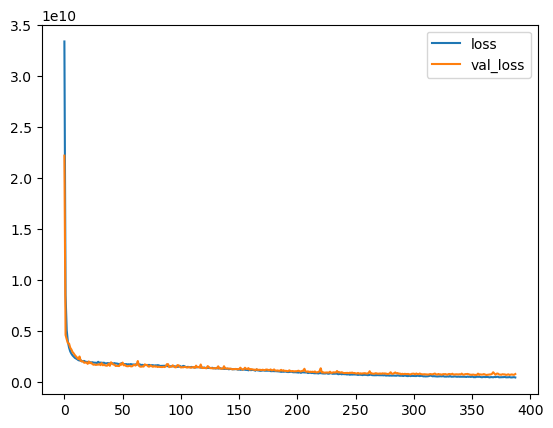

In [27]:
pd.DataFrame(nn_model.history.history)[['loss','val_loss']].plot()

In [28]:
nn_model.evaluate(X_val, y_val)

10/10 [==============================] - 0s 2ms/step - loss: 811929344.0000 - r_square: 0.8941


[811929344.0, 0.8941466212272644]

In [29]:
y_pred=nn_model.predict(X_val)
print('R2 Score:',r2_score(y_true=y_val, y_pred=y_pred))
print('Mean Absolude Error:',mean_absolute_error(y_true=y_val, y_pred=y_pred))
print('Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred))
print('Root Mean Square Error:',mean_squared_error(y_true=y_val, y_pred=y_pred, squared=False))

10/10 [==============================] - 0s 1ms/step
R2 Score: 0.8941466999928125
Mean Absolude Error: 18573.03447399401
Mean Square Error: 811929341.162371
Root Mean Square Error: 28494.37385103191


In [30]:
sample_submission['Id'] = test.reset_index()['Id']
sample_submission.SalePrice = nn_model.predict(X_test)
sample_submission.set_index('Id').to_csv('submissionNN.csv')
print(sample_submission)

46/46 [==============================] - 0s 1ms/step
        Id      SalePrice
0     1461  109346.992188
1     1462  154575.265625
2     1463  187926.593750
3     1464  194341.718750
4     1465  167344.453125
...    ...            ...
1454  2915   83666.812500
1455  2916  101456.179688
1456  2917  192011.031250
1457  2918  100418.546875
1458  2919  220523.968750

[1459 rows x 2 columns]
